In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('chum.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,Yes


In [2]:
df.shape

(7043, 20)

In [3]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
# QUESTION 1
# Once the data is read, look at the summary statistics to answer the below

# The average Tenure of all the customers in the data is ___(Calsulate the Average Tenure and round it two decimal places)
print(round(df.tenure.mean(), 2))

32.4


In [5]:
# QUESTION 2
# Once the data is read, Look at the summary statistics to answer the question elow

# The average Tenure of the customers who churn is and those who do not churn is (round the answer to two decimal places)
print(round(df.groupby('Churn').tenure.mean(), 2))

Churn
No     37.57
Yes    18.09
Name: tenure, dtype: float64


In [6]:
# QUESTION 3
# Once the data is read, Look at the summary statistics to answer the question below

# How many missing values the feature MonthlyCharges has
df.MonthlyCharges.isnull().sum()

202

In [7]:
# QUESTION 4
# Once the data is read, Look at the summary statistics to answer the question below

# Looking at the summary statistics (using the describe function of pandas) __ seems to be a potential outlier for tenure.
df.describe()
# Looking at the maximum of tenure column we can easily say that 172 is outlier because nobody can live 172 years TO AVAIL SERVICE
# ANSWER IS 172

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,6841.000000
mean,0.162147,32.399546,64.588203
std,0.368612,24.662895,30.513819
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,34.250000
50%,0.000000,29.000000,69.800000
75%,0.000000,55.000000,90.200000
max,1.000000,172.000000,118.750000


In [8]:
# QUESTION 5
# Once the data is read, Look at the summary statistics to answer the question below\


# lies at or below 99% of the data for the feature MonthlyCharges and lies at or velow 99% of the data for feature Tenure [Numeric Input: round the answer to two decimal places wherever applicable. Example if your answer is 154.6778 say 154.68]
df[['MonthlyCharges', 'tenure']].quantile(.99).round(decimals=2)

MonthlyCharges    114.88
tenure             72.00
Name: 0.99, dtype: float64

In [9]:
# QUESTION 6
# Now that we have taken a look at some continuous features, lets take a look at some categorical features and their relationship with the target (‘Churn’)

# ____% is the total percentage of churned customers in the data. [Numeric Input. Rounded up. Example – if 23.67 or 24% write 24 as answer]
df['Churn'].value_counts(normalize=True)

# Answer is 27% is the total perecentage of churned customers in the data


No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [10]:
# QUESTION 7
# Now that we have taken a look at some continuous features, lets take a look at some categorical features and their relationship with the target (‘Churn’)

# Amongst those who churned,  % of the customers who have Dependents tend to churn and  % of the customers who do not have Dependents tend not to churn. 
# Hence, we observe that there is a variation in Churn behaviour by this feature “Dependents”.
# [Numeric Input Rounded up. Example – if 23.67 or 24% write 24 as answer] 
# [[Create a cross tabulation using Churn and Dependents columns and calculate percentage on the basis of total no.
# of observations or  rows in the data. In other words use total rows in the data as denominator for percentage]]
pd.crosstab(df['Churn'], df['Dependents']).count
# Answer is
# Customers who have Dependents tend to churn is 5%
# Customers who do not have Dependets tend not to churn is 48%


<bound method DataFrame.count of Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326>

In [11]:
# QUESTION 8
# Amongst those customers who churned, customers who opt for____Internet Service have the least percentage of churn. [Character Input - Use the same label as given in the data]
df1 = df[df['Churn']=='Yes']
df1.InternetService.value_counts()
# Answer is DSL
# customers who opt for DSL Internet Servie have the least percentage of churn

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

<AxesSubplot:>

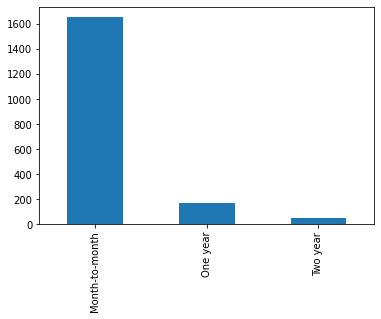

In [12]:
# QUESTION 9
# Customers with a ___ contract seem to have the maximum percentage of churn. [Character - Use the same label as give in the data]

df1 = df[df['Churn']=='Yes']
df1.Contract.value_counts().plot(kind='bar')
# Answer is month-to-month churn percentage

In [13]:
# QUESTION 10
# Now that we have taken a look at some continuous features, lets take a look at some categorical features and their relationship with the target (‘Churn’)

# Customers who use ___ ___ as Payment Method tend to churn the maximum. [Character Input 2 words- Use the same label as given in the data]
df1 = df[df['Churn']=='Yes']
df1.PaymentMethod.value_counts()
# Answer is Electronic check

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [14]:
# QUESTION 11
# Once the step of Feature Understanding is complete, lets now start Engineering the Features based on the insights about the feature that tend to impact the churn.

# 1. Treat the missing values in the Feature MonthlyCharges by replacing them with the average value of the Monthly Charges column. Is there a change in overall average value of the Feature Monthly Charges after the missing value treatment?___[Yes/No – Character Input].(In the average values consider changes (if any) only upto two decimals places)
# print('Total missing values = {}'.format(df.MonthlyCharges.isnull().sum()))
print("mean before filling nan values = {}".format(df.MonthlyCharges.mean()))
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())
# print("Total missing values after filna = {}".format(df.MonthlyCharges.isnull().sum()))
df.MonthlyCharges.mean()
# There is no differece in mean before and after filling the missing values so  THE ANSWER IS NO

mean before filling nan values = 64.58820347902353


64.58820347902353

In [15]:
# QUESTION 12
# 2. Treat the outliers in the column Tenure. All the values that are greater than 72 in this feature, convert those values to 72. There are only two such values. The new average after the outlier treatment for the column Tenure is ____ [Numeric Input – Round upto two decimals. Example if output is 52.324 mention as 52.32 or if its 52.327 mention 52.33]
print(df.tenure.mean())
df['tenure'][df['tenure'] > 72] = 72
df.tenure.mean()
# The new average of tenure after outlier treatment is 32.37

32.39954564816129


C:\Users\91951\AppData\Local\Temp/ipykernel_6748/3820555741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure'][df['tenure'] > 72] = 72


32.37114865824223

Yes    0.600856
No     0.399144
Name: singles, dtype: float64


<AxesSubplot:>

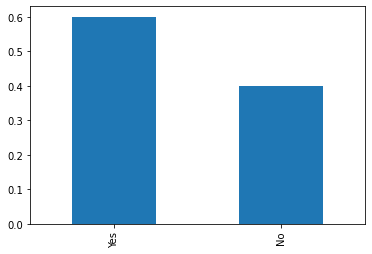

In [16]:
# QUESTION 13
# To prepare the data for modelling, we will need to convert all the categorical variables into quantitative by using one hot encoding. But before we do that, we will also need to bring out information from the features that possible only by combining features. Its seems that customers who have no Partners and no Dependents tend to churn a lot. Instead of having two separate columns – Partner and Dependents in the data, create a feature that has a flag for those with no Partners and no Dependents. Lets call this feature – “Singles”.___% is the percentage of singles that tend to churn.[Numeric Input –Example- If the answer is 24.67 or 25% write it as 25 in the blank] [[Create a cross tabulation using Churn and Singles columns and calculate percentage on the basis of total no. of observations or rows in the data. In other words use total rows in the data as denominator to calculate percentage]]
def singlecheck(Partner, Dependents):
    if Partner == 'No' and Dependents == 'No':
        f = 'Yes'
    else:
        f = 'No'
    return f
df['singles'] = df.apply(lambda x: singlecheck(x['Partner'], x['Dependents']), axis=1)
df['singles']
df2 = df[df['Churn']=='Yes']
print(df2.singles.value_counts(normalize=True))
df2.singles.value_counts(normalize=True).plot(kind='bar')
# Answer 60% is the percentage of singles that tend to churn

In [17]:
# QUESTION 14
# Create a column where those with Month-to-Month Contract are flagged as 1 and all other labels in the Contract column are flagged as 0. This column has a count of  for 1’s and a count of  for 0’s. [Numeric Input]
df['MonthtoMonth'] = [1 if x == 'Month-to-month' else 0 for x in df['Contract']]
print(df.MonthtoMonth.value_counts())

1    3875
0    3168
Name: MonthtoMonth, dtype: int64


In [18]:
# QUESTION 15
# Create a bucketed feature for Tenure (Make sure you used the new Tenure column that is treated for outliers). Those with less than 12 months, flag these are “short”, Those with tenure between 12 and 36 months, flag them as “medium” and the rest of the values as “long”.  is the count for the “short” label,  is the count for the “medium” label and  is the count for the “long” label. [Numeric Input]
def tenureBucketCheck(tenure):
    if tenure < 12:
        f = 'short'
    elif tenure >=12 and tenure < 36:
        f = 'medium'
    else:
        f = 'long'
    return f
        
df['tenure_bucket'] = df.apply(lambda x: tenureBucketCheck(x['tenure']), axis=1)
print(df.tenure_bucket.value_counts())
# Long 3051
# short 2069
# medium 1923

long      3051
short     2069
medium    1923
Name: tenure_bucket, dtype: int64


In [19]:
# QUESTION 16
# Create a new column called (Short_Contracts) that’s a combination of Month-to-Month Contracts and customers with short tenures (less than 12 months). __ is the churn percentage for this column Short_Contracts? .[Numeric Input –Example- If the answer is 0.67 or 67% write it as 67 in the blank] .[Numeric Input rounded up (no decimals) –Example- If the answer is 23.67 or 24% write it as 24 in the blank] [[Create a cross tabulation using Churn and Short_Contracts columns and calculate percentage on the basis of total no. of observations or rows in the data. In other words use total rows in the data as denominator for percentage]]
def shortCheck(MonthtoMonth, tenure_bucket):
    if MonthtoMonth == 1 and tenure_bucket == 'short':
        f = 'Yes'
    else:
        f = 'No'
    return f
df['Short_Contracts'] = df.apply(lambda x: shortCheck(x['MonthtoMonth'], x['tenure_bucket']), axis=1)
df2 = df[df['Churn']=='Yes']
print(df2.Short_Contracts.value_counts(normalize=True))
# Answer is 53%  of short contract are tend to churn

Yes    0.53023
No     0.46977
Name: Short_Contracts, dtype: float64


In [20]:
# QUESTION 17
# Create a new column called (Short_Contracts) that’s a combination of Month-to-Month Contracts and customers with short tenures (less than 12 months). __ is the churn percentage for this column Short_Contracts? .[Numeric Input –Example- If the answer is 0.67 or 67% write it as 67 in the blank] .[Numeric Input rounded up (no decimals) –Example- If the answer is 23.67 or 24% write it as 24 in the blank] [[Create a cross tabulation using Churn and Short_Contracts columns and calculate percentage on the basis of total no. of observations or rows in the data. In other words use total rows in the data as denominator for percentage]]

def PaymentMethodCheck(PaymentMethod):
    if PaymentMethod == 'Electronic check':
        f = 1
    else:
        f = 0
    return f
df['PaymentMethodEncode'] = df.apply(lambda x: PaymentMethodCheck(x['PaymentMethod']), axis = 1)
df.PaymentMethodEncode.value_counts(normalize=True)
# Answer
# 33 is the percentage of churn who opt for Electronic check as a payment methos
# 66 if the percentage of churn who opt for automatic payment methods

0    0.664206
1    0.335794
Name: PaymentMethodEncode, dtype: float64

In [21]:
# Question 18
# 6. Create a new column to flag those with No Online Security, No Tech Support, No Device Protection and No Online Backup. _______ is the churn percentage for this column? .[Numeric Input rounded up (no decimals) –Example- If the answer is 23.67 or 24% write it as 24 in the blank] [[Create a cross tabulation using Churn and this new column and calculate percentage on the basis of total no. of observations or  rows in the data. In other words use total rows in the data as denominator for percentage]] 

def nobucketcheck(OnlineSecurity, TechSupport, DeviceProtection, OnlineBackup):
    if OnlineSecurity == 'No' and TechSupport == 'No' and DeviceProtection == 'No' and OnlineBackup == 'No':
        f = 0
    else:
        f = 1
    return f
df['No_bucket'] = df.apply(lambda x: nobucketcheck(x['OnlineSecurity'], x['TechSupport'], x['DeviceProtection'], x['OnlineBackup']), axis=1)
df4 = df[df['Churn']=='Yes']
df4.No_bucket.value_counts(normalize=True)
# 38% is tend to churn

1    0.615837
0    0.384163
Name: No_bucket, dtype: float64

In [22]:
# QUESTION 19
# Its also seen from the data, that those who pay high monthly charges are likely to churn as compared to those who pay less monthly charges. To bring out this information in the model, flag those rows with monthly charges less than 35 as low, 35 to 55 as medium and above 55 as High. _____ is the churn percentage amongst those who pay high monthly charges.

# [Numeric Input rounded up (no decimals) –Example- If the answer is 23.67 or 24% write it as 24 in the blank] [[Create a cross tabulation using Churn and the bucketed Monthly Charges column and calculate percentage on the basis of total no. of observations or rows in the data. In other words use total rows in the data as denominator for percentage]]
def MonthlyChargesBucketCheck(MonthlyCharges):
    if MonthlyCharges < 35:
        f = 'low'
    elif MonthlyCharges >=35 and MonthlyCharges < 55:
        f = 'medium'
    else:
        f = 'High'
    return f
        
df['MonthlyCharges_bucket'] = df.apply(lambda x: MonthlyChargesBucketCheck(x['MonthlyCharges']), axis=1)
df5 = df[df['Churn']=='Yes']
print(df5.MonthlyCharges_bucket.value_counts(normalize=True))
# Answer is
# High    77%
# medium  13%
# low     10%

High      0.767790
medium    0.131621
low       0.100589
Name: MonthlyCharges_bucket, dtype: float64


In [23]:
pd.pandas.set_option('display.max_columns', None)

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,singles,MonthtoMonth,tenure_bucket,Short_Contracts,PaymentMethodEncode,No_bucket,MonthlyCharges_bucket
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No,No,1,short,Yes,1,1,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,No,Yes,0,medium,No,0,1,High
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,Yes,Yes,1,short,Yes,0,1,medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,No,Yes,0,long,No,0,1,medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,64.588203,Yes,Yes,1,short,Yes,1,0,High


# Feature Engineering

In [25]:
df01 = df.copy()

In [26]:
#df01 = df01.drop(['customerID', 'Partner', "Dependents", "tenure", "Contract", 'PaymentMethod', "TechSupport", "DeviceProtection", "OnlineBackup", "OnlineSecurity", "MonthlyCharges"], axis=1)

In [27]:
df01 = df01.drop(['customerID'], axis=1)

In [28]:
pd.pandas.set_option("display.max_columns", None)
pd.pandas.set_option('display.max_rows', None)

In [29]:
df01.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,singles,MonthtoMonth,tenure_bucket,Short_Contracts,PaymentMethodEncode,No_bucket,MonthlyCharges_bucket
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No,No,1,short,Yes,1,1,low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,No,Yes,0,medium,No,0,1,High
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,Yes,Yes,1,short,Yes,0,1,medium
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,No,Yes,0,long,No,0,1,medium
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,64.588203,Yes,Yes,1,short,Yes,1,0,High


In [30]:
df01.shape

(7043, 26)

In [31]:
numerical_features = [feature for feature in df01.columns if df01[feature].dtypes != 'O' and feature != 'Churn']

In [32]:
numerical_features

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'MonthtoMonth',
 'PaymentMethodEncode',
 'No_bucket']

In [33]:
categorical_features = [feature for feature in df01.columns if df01[feature].dtypes == 'O' and feature not in 'Churn']

In [34]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'singles',
 'tenure_bucket',
 'Short_Contracts',
 'MonthlyCharges_bucket']

In [35]:
for feature in categorical_features:
    print(feature, df01[feature].value_counts())
    print(len(df01[feature].value_counts()))
    
    print("\n")

gender Male      3555
Female    3488
Name: gender, dtype: int64
2


Partner No     3641
Yes    3402
Name: Partner, dtype: int64
2


Dependents No     4933
Yes    2110
Name: Dependents, dtype: int64
2


PhoneService Yes    6361
No      682
Name: PhoneService, dtype: int64
2


MultipleLines No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
3


InternetService Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
3


OnlineSecurity No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
3


OnlineBackup No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
3


DeviceProtection No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
3


TechSupport No                     3473
Yes                    2044

# One_Hot_Encoding for Ordinal Variables

In [36]:
dictionary = [{'col':'tenure_bucket', 'mapping':{'short':1, 'medium':2, 'long':3}}]

In [37]:
import category_encoders as ce

In [38]:
encoder = ce.OrdinalEncoder(cols='tenure_bucket', mapping=dictionary)

In [39]:
df01 = encoder.fit_transform(df01)

In [40]:
df01.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,singles,MonthtoMonth,tenure_bucket,Short_Contracts,PaymentMethodEncode,No_bucket,MonthlyCharges_bucket
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No,No,1,1,Yes,1,1,low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,No,Yes,0,2,No,0,1,High
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,Yes,Yes,1,1,Yes,0,1,medium
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,No,Yes,0,3,No,0,1,medium
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,64.588203,Yes,Yes,1,1,Yes,1,0,High


In [41]:
dictionary = [{'col':'MonthlyCharges_bucket', 'mapping':{'low':1, 'medium':2, 'High':3}}]
encoder = ce.OrdinalEncoder(cols='MonthlyCharges_bucket', mapping=dictionary)
df01 = encoder.fit_transform(df01)

In [42]:
df01.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,singles,MonthtoMonth,tenure_bucket,Short_Contracts,PaymentMethodEncode,No_bucket,MonthlyCharges_bucket
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,No,No,1,1,Yes,1,1,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000,No,Yes,0,2,No,0,1,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,Yes,Yes,1,1,Yes,0,1,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,No,Yes,0,3,No,0,1,2
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,64.588203,Yes,Yes,1,1,Yes,1,0,3


# Normal One_Hot_Encoding

In [43]:
# splitting into x and y
x = df01.drop('Churn', axis=1)

In [44]:
x = pd.get_dummies(x, drop_first=True)

In [45]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,MonthtoMonth,tenure_bucket,PaymentMethodEncode,No_bucket,MonthlyCharges_bucket,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,singles_Yes,Short_Contracts_Yes
0,0,1,29.850000,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,0,34,56.950000,0,2,0,1,3,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,0,2,53.850000,1,1,0,1,2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
3,0,45,42.300000,0,3,0,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,2,64.588203,1,1,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1


In [46]:
x.shape

(7043, 36)

In [47]:
df01['Churn'] = pd.get_dummies(df01['Churn'], drop_first=True)

In [48]:
df01.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [49]:
y = df01['Churn']

In [50]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: uint8

In [51]:
# finding the correlated feature more than 60%
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MonthlyCharges_bucket',
 'MultipleLines_No phone service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'PaymentMethod_Electronic check',
 'Short_Contracts_Yes',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'singles_Yes',
 'tenure_bucket'}

<AxesSubplot:>

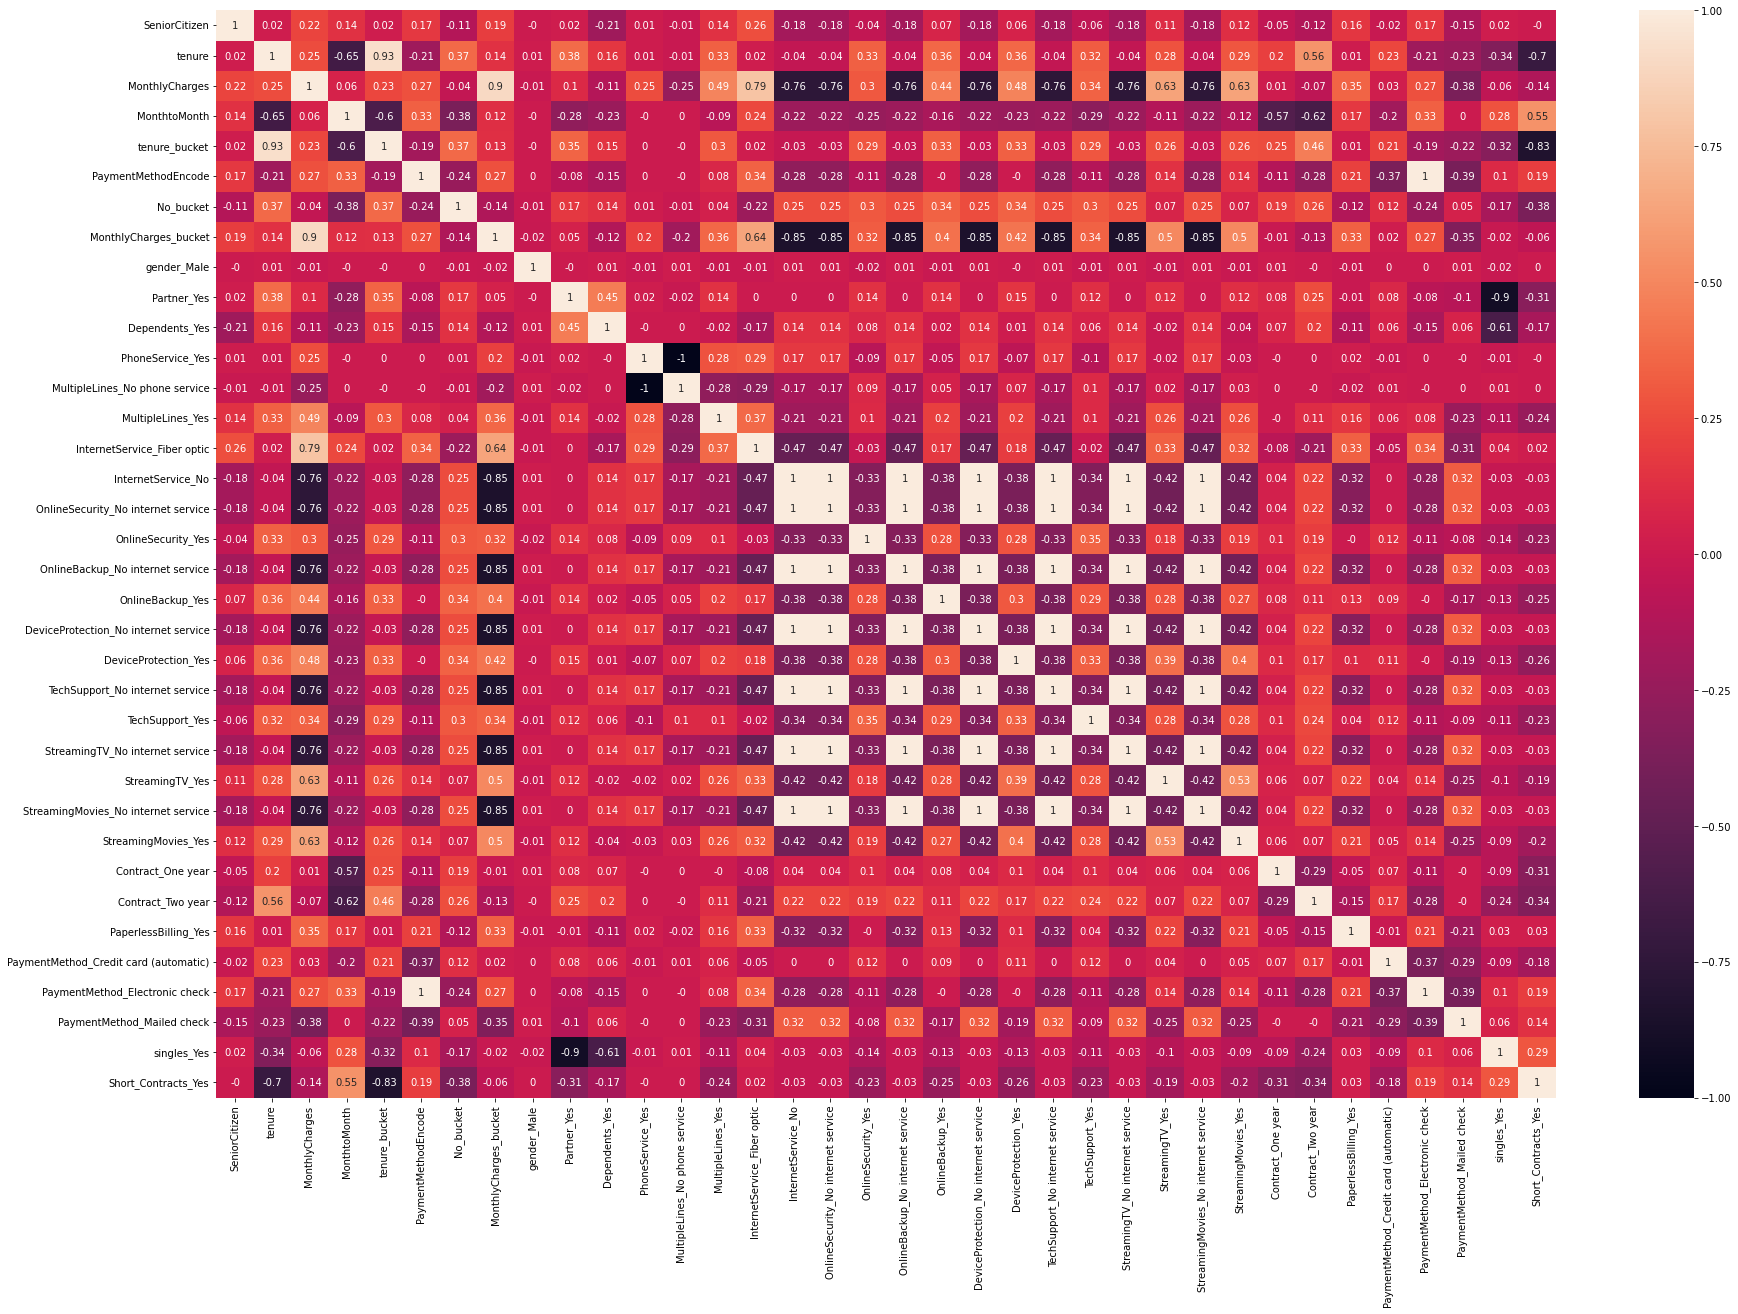

In [52]:
#Plotting correlation map
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(30,20))
sns.heatmap(x.corr().round(2), vmin=-1, vmax=1, annot = True)

In [53]:
# Removing Correlated Features
x = x.drop([
 'InternetService_Fiber optic',
 'InternetService_No',
 'MonthlyCharges_bucket',
 'MonthtoMonth',
 'MultipleLines_No phone service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'PaymentMethod_Electronic check',
 'Short_Contracts_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'tenure_bucket'], axis=1)

<AxesSubplot:>

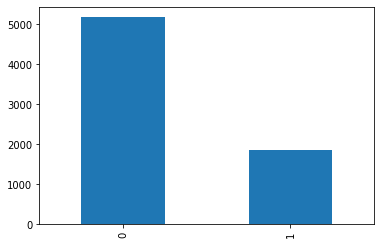

In [54]:
y.value_counts().plot(kind='bar')

In [55]:
y.mean()

0.2653698707936959

In [56]:
x.shape

(7043, 22)

In [57]:
# Making Balanced Data
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(x, y)

In [58]:
X_res.shape

(10136, 22)

In [59]:
y_res.shape

(10136,)

In [60]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=0)

In [61]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [62]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RF', RandomForestClassifier()))
models.append(('Xgboost', XGBClassifier(random_state=7)))
models.append(('DT', DecisionTreeClassifier()))

In [63]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.821901 (0.014166)
RF: 0.856065 (0.011184)


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost: 0.849897 (0.012380)
DT: 0.805127 (0.014366)


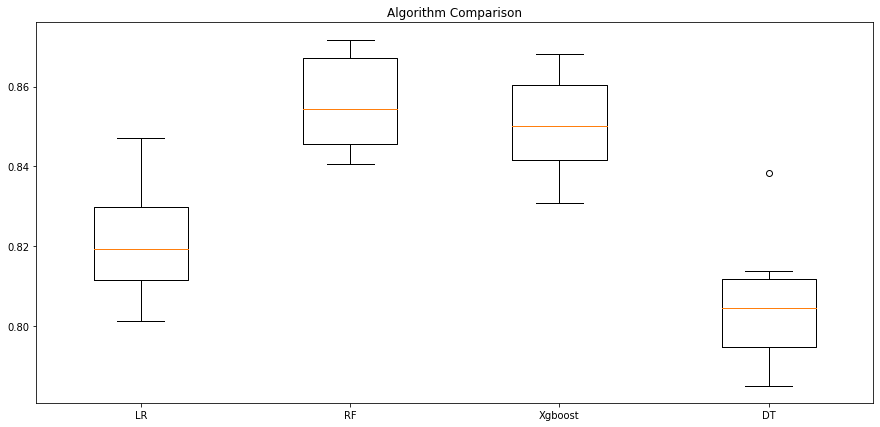

In [64]:
# compare Algorithms
fig = plt.figure(figsize=(15, 7))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [65]:
from xgboost import XGBClassifier

In [66]:
classifier = XGBClassifier().fit(x_train, y_train)

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
y_pred = classifier.predict(x_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       973
           1       0.85      0.86      0.86      1055

    accuracy                           0.85      2028
   macro avg       0.85      0.85      0.85      2028
weighted avg       0.85      0.85      0.85      2028



In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[812 161]
 [146 909]]
